#**IMDB Data Analysis of 1M Movies (EDA)**
**Author:** `Panagiotis Kardatos`

**Date:** `Mid October 2025`

The main objective of this project is to find out how the film industry has evolved over time in terms of commercial success, quality and theamatic diversity. Through of TMDB and IMDB datasets we aim to uncover patterns and trends related to genres, ratings, revenue and audience preferences across decades.

##**Step 1: Data Import and Setup**

At this step we will import:
*  The required libraries for the project
*  Acquire the dataset(s)
*  Setting up the initial DataFrame


In [148]:
#Install Kaggle
!pip install Kaggle

In [149]:
#Install Kagglehub
!pip install kagglehub

In [150]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub as kh
import os

In [151]:
#Folder Path
path=kh.dataset_download("alanvourch/tmdb-movies-daily-updates")
print(path)

Using Colab cache for faster access to the 'tmdb-movies-daily-updates' dataset.
/kaggle/input/tmdb-movies-daily-updates


In [152]:
#Full File Path
file_path=os.path.join(path, "TMDB_all_movies.csv")
print(file_path)

/kaggle/input/tmdb-movies-daily-updates/TMDB_all_movies.csv


In [153]:
#Creating the DataFrame
df=pd.read_csv(file_path, sep=',')

##**Step 2: Data Inspection**
At this step we will get:
*  A first view of the dataset
*  Spot the shape, and gather some first info
*  Search for any missing values

This procedure will help us a lot to understand the dataset so we can proceed with the next step Data Cleaning.

In [154]:
#We 'll leave the original DataFrame intact
df1 = df.copy()

In [155]:
#First Rows
df1.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes,poster_path
0,2,Ariel,7.100,356.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,suomi,"Susanna Haavisto, Pentti Auer, Olli Varja, Mer...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN,7.4,9426.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg
1,3,Shadows in Paradise,7.290,416.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,"suomi, English, svenska","Kylli Köngäs, Esko Nikkari, Marina Martinoff, ...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN,7.4,8276.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg
2,5,Four Rooms,5.869,2736.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,English,"Lawrence Bender, Valeria Golino, Jennifer Beal...","Robert Rodriguez, Allison Anders, Quentin Tara...","Andrzej Sekula, Phil Parmet, Guillermo Navarro...","Robert Rodriguez, Allison Anders, Quentin Tara...","Quentin Tarantino, Alexandre Rockwell, Lawrenc...",Combustible Edison,6.7,115301.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg
3,6,Judgment Night,6.500,360.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,English,"Doug Wert, Angela Alvarado, Everlast, Sean O'G...",Stephen Hopkins,Peter Levy,"Lewis Colick, Jere Cunningham","Marilyn Vance, Gene Levy, Lloyd Segan",Alan Silvestri,6.6,20447.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg
4,8,Life in Loops (A Megacities RMX),7.500,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN,8.1,285.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg


In [156]:
#Shape
df1.shape

(1116358, 28)

In [157]:
#General Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116358 entries, 0 to 1116357
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1116358 non-null  int64  
 1   title                    1116343 non-null  object 
 2   vote_average             1116358 non-null  float64
 3   vote_count               1116358 non-null  float64
 4   status                   1116358 non-null  object 
 5   release_date             1001302 non-null  object 
 6   revenue                  1116358 non-null  float64
 7   runtime                  1116358 non-null  float64
 8   budget                   1116358 non-null  float64
 9   imdb_id                  635244 non-null   object 
 10  original_language        1116358 non-null  object 
 11  original_title           1116343 non-null  object 
 12  overview                 942727 non-null   object 
 13  popularity               1116358 non-null 

In [158]:
#Νull Values per column
df1.isnull().sum()

,0
id,0
title,15
vote_average,0
vote_count,0
status,0
release_date,115056
revenue,0
runtime,0
budget,0
imdb_id,481114


As a first comment, we have a heterogenous dataset and we need to be **extremely** carefull at the next step (Data Cleaning) as a single .dropna() can delete up to 992.412 rows.

##**Step 3: Data Cleaning**

At this step we will drop and manipulate the data that will affect the overall dataset's analysis. We will check:
*  Missing Values
*  Duplicate Entries
*  Ensure columns have the correct data type

###**Initial Work**

As we see diffrent columns have diffrent number of NA's. This means that in order to examine the dataset in a specific feature we need to break the original dataframe to more than one, otherwise by simply wiping hundrend of thousands rows we will introduce bias. From the original dataframe we already have a copy. We will make a second copy as well. So the original EDA Analysis will be performed in 2 diffrent dataframes. In the first copied dataframe we absolutely need release date and genre to find time trends and as many columns as possible and with the second copied dataframe we will analyze IMDB ratings. Bear in mind that we will lose thousand of rows from filtering. We will try to keep as many possible.

In [159]:
#Second Copy for IMDB use
df2 = df.copy()

In [160]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116358 entries, 0 to 1116357
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1116358 non-null  int64  
 1   title                    1116343 non-null  object 
 2   vote_average             1116358 non-null  float64
 3   vote_count               1116358 non-null  float64
 4   status                   1116358 non-null  object 
 5   release_date             1001302 non-null  object 
 6   revenue                  1116358 non-null  float64
 7   runtime                  1116358 non-null  float64
 8   budget                   1116358 non-null  float64
 9   imdb_id                  635244 non-null   object 
 10  original_language        1116358 non-null  object 
 11  original_title           1116343 non-null  object 
 12  overview                 942727 non-null   object 
 13  popularity               1116358 non-null 

In [161]:
#Dropping Columns
df1.drop(columns=['id','imdb_id','original_title','overview','tagline',
                  'production_companies','production_countries',
                  'spoken_languages','director','director_of_photography',
                  'writers','producers','cast','music_composer','imdb_rating',
                  'imdb_votes','poster_path'], inplace=True)
df2.drop(columns=['id','vote_average','vote_count','revenue','budget','imdb_id',
                  'original_title','overview','tagline','spoken_languages',
                  'director_of_photography','producers','music_composer',
                  'popularity','poster_path'], inplace=True)

In [162]:
#Current information
print(f'{df1.info()} \n \n \n {df2.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116358 entries, 0 to 1116357
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   title              1116343 non-null  object 
 1   vote_average       1116358 non-null  float64
 2   vote_count         1116358 non-null  float64
 3   status             1116358 non-null  object 
 4   release_date       1001302 non-null  object 
 5   revenue            1116358 non-null  float64
 6   runtime            1116358 non-null  float64
 7   budget             1116358 non-null  float64
 8   original_language  1116358 non-null  object 
 9   popularity         1116358 non-null  float64
 10  genres             810593 non-null   object 
dtypes: float64(6), object(5)
memory usage: 93.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116358 entries, 0 to 1116357
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------       

Many movies may have 0 as value in columns such as runtime, revenue and budget. This indicates that we have null values or theese values are unknown. At first we will keep all movies that have have an actual runtime value in both dataframes. This is going to be the first step of filtering applied to both dataframes.

In [163]:
#Runtime Filtering
df1 = df1[df1['runtime']>0]
df2 = df2[df2['runtime']>0]

###**EDA1 - Movie characteristics & production analysis (DataFrame1 Cleaning)**

Here we will verify how many movies have positive revenue and budget as this will affect the the economical analysis.

In [164]:
#Verification
print(f'There are {((df1['revenue']>0)&(df1['budget']>0)).sum()} with positive revenue and budget and {((df1['revenue']==0)&(df1['budget']==0)).sum()} with zero revenue and budget')

There are 15311 with positive revenue and budget and 789241 with zero revenue and budget


Clearly we will make 2 more sub-dataframes of df1, as a single replace of 0 with np.nan followed by dropna can eliminate up to 788k rows. First will be for general analysis and the second for economic analysis.

In [165]:
#Sub DataFrames
df1_1 = df1.drop(columns=['revenue','budget']) #For General Analysis
df1_2 = df1[(df1['revenue']>0)&(df1['budget']>0)] #For Economic Analysis

We will drop NA's from title, release date and genre as this can affect overall analysis for df1_1. Same thing for df1_2.

In [166]:
#Dropping NA's
df1_1.dropna(subset=['title','release_date','genres'],inplace=True)
df1_2.dropna(subset=['title','release_date','genres'],inplace=True)

/tmp/ipython-input-2158141681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_2.dropna(subset=['title','release_date','genres'],inplace=True)


Now we will check for duplicates but since the dataset is too large we will also make a manual inspection to verify the results.

In [167]:
#Duplication Check
print(f'There are {df1_1.duplicated().sum()} duplicated rows for df1_1 and {df1_2.duplicated().sum()} for df1_2')

There are 11 duplicated rows for df1_1 and 0 for df1_2


In [168]:
#Manual Inspection
A = df1_1.index[df1_1.duplicated(keep=False)].tolist() #Create list with indexes of duplicated rows for df1_1
B = df1_2.index[df1_2.duplicated(keep=False)].tolist() #Create list with indexes of duplicated rows for df1_2

#Creating Loops for both DataFrames
print('The duplicate pairs for df1_1 are:')
for i in range(len(A)): #For DataFrame1_1
  for j in range(i+1,len(A)):
    if df1_1.loc[A[i]].equals(df1_1.loc[A[j]]):
      print(A[i],A[j])

print('The duplicate pairs for df1_2 are:')
for i in range(len(B)): #For DataFrame1_2
  for j in range(i+1,len(B)):
    if df1_1.loc[B[i]].equals(df1_1.loc[B[j]]):
      print(B[i],B[j])

The duplicate pairs for df1_1 are:
290514 577634
432434 637010
489567 801706
496722 496731
555625 798407
610131 610140
685451 685457
789039 918302
807839 807849
834800 862353
845906 845909
The duplicate pairs for df1_2 are:


In [169]:
#Duplicates Validation
print(f'{df1_1.loc[290514]}\n \n \n{df1_1.loc[577634]} A duplicate pair for df1_1')

title                Hubble's Final Frontier
vote_average                             0.0
vote_count                               0.0
status                              Released
release_date                      2009-01-23
runtime                                 45.0
original_language                         en
popularity                               0.6
genres                           Documentary
Name: 290514, dtype: object
 
 
title                Hubble's Final Frontier
vote_average                             0.0
vote_count                               0.0
status                              Released
release_date                      2009-01-23
runtime                                 45.0
original_language                         en
popularity                               0.6
genres                           Documentary
Name: 577634, dtype: object A duplicate pair for df1_1


In [170]:
#Dropping Duplicates
df1_1.drop_duplicates(keep='first',inplace=True)
df1_2.drop_duplicates(keep='first',inplace=True)

/tmp/ipython-input-3181184797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_2.drop_duplicates(keep='first',inplace=True)


In [171]:
#Resetting Index
df1_1.reset_index(drop=True,inplace=True)
df1_2.reset_index(drop=True,inplace=True)

###**EDA2 (IMDB) - Audience perception & rating behavior analysis (DataFrame2 Cleaning)**

In [172]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859618 entries, 0 to 1116351
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   title                 859613 non-null  object 
 1   status                859618 non-null  object 
 2   release_date          801023 non-null  object 
 3   runtime               859618 non-null  float64
 4   original_language     859618 non-null  object 
 5   genres                659761 non-null  object 
 6   production_companies  442795 non-null  object 
 7   production_countries  571574 non-null  object 
 8   cast                  610706 non-null  object 
 9   director              765230 non-null  object 
 10  writers               471886 non-null  object 
 11  imdb_rating           410119 non-null  float64
 12  imdb_votes            410119 non-null  float64
dtypes: float64(3), object(10)
memory usage: 91.8+ MB


We will investigate how diffrent columns affect the overall rows drop count. The columns **`title`, `status`, `release_date`, `runtime`, `original_language`, `imdb_rating`, `imdb_votes`** must be included at all costs at the final Dataframe.

In [173]:
#Creating a list with the columns to be investigated
C =['production_companies','production_countries','cast','director','writers']

for i in C:
  print(f'The length of Dataframe by dropping column {i} is {len(df2.dropna(subset=['title','status','release_date','runtime','original_language','genres','imdb_rating','imdb_votes',i]))}')

The length of Dataframe by dropping column production_companies is 270648
The length of Dataframe by dropping column production_countries is 317958
The length of Dataframe by dropping column cast is 330511
The length of Dataframe by dropping column director is 357661
The length of Dataframe by dropping column writers is 285583


`Production Companies` and `Writers` columns are causing the most loss. So we will completely drop them. Dropping theese 2 columns are saving up to 80k rows!

In [174]:
#Dropping Columns
df2.drop(columns=['production_companies','writers'],inplace=True)

In [175]:
#Dropping NA's
df2.dropna(inplace=True)

Now as above we will perform a duplication test, and eliminate the duplicates. As we will see we don't have any and we will proceed with index reset.

In [176]:
#Duplicates Check
df2.duplicated().sum()

np.int64(0)

In [177]:
#Reset Index
df2.reset_index(drop=True,inplace=True)

##**Step 4: Feature Engineering**
In this step, we will create additional features to enhance the analysis.
Since the raw dataset contains mostly descriptive information, our goal is to extract useful numerical and categorical insights from existing columns.

*   Genre simplification → Keep only the first listed genre (main genre) to reduce categorical noise.

*   Rating bins → Create rating categories such as:

      0–4.9 → Poor

      5.0–6.9 → Average

      7.0–8.4 → Good

      8.5–10.0 → Excellent
      
      This helps visualize the distribution of movie quality.

*   Runtime bins, categorize movies as:
      
      → Short (<80 min)
      
      → Standard (80–120 min)
      
      → Long (>120 min)

*   Decade
*   Movie Profit
*   ROI (Return on Investment)


**For General Analysis (df1_1)**

In [178]:
#Genre Simplification
df1_1['genres_simplified'] = df1_1['genres'].apply(lambda x: x.split(',')[0])

In [179]:
#Rating Bins (from Vote Average)
bins = [0,4.9,6.9,8.4,10]
labels = ['Poor','Average','Good','Excellent']
df1_1['rating_bins'] = pd.cut(df1_1['vote_average'], bins=bins, labels=labels)

In [180]:
#Runtime Bins
bins1 = [0,80,120,np.inf]
labels1 = ['Short','Standard','Long']
df1_1['runtime_bins'] = pd.cut(df1_1['runtime'], bins=bins1, labels=labels1)

In [181]:
#Decade
df1_1['decade'] = df1_1['release_date'].apply(lambda x: x[0:3]+'0s')

**For Economic Anlysis (df1_2)**

In [182]:
#Decade
df1_2['decade'] = df1_2['release_date'].apply(lambda x: x[0:3]+'0s')

/tmp/ipython-input-1967503570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_2['decade'] = df1_2['release_date'].apply(lambda x: x[0:3]+'0s')


In [183]:
#Movie Profit
df1_2['profit'] = df1_2['revenue'] - df1_2['budget']

/tmp/ipython-input-730984816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_2['profit'] = df1_2['revenue'] - df1_2['budget']


In [184]:
#ROI (Return on Investment)
df1_2['roi'] = (df1_2['revenue'] - df1_2['budget']) / df1_2['budget']
df1_2 = df1_2[df1_2['roi'].between(-1, 10)].reset_index()

/tmp/ipython-input-1293334189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_2['roi'] = (df1_2['revenue'] - df1_2['budget']) / df1_2['budget']


In [185]:
#Genre Simplification
df1_2['genres_simplified']=df1_2['genres'].apply(lambda x: x.split(',')[0])

**For IMDB Ratings (df2)**

In [186]:
#Release Year + Relase Decade
df2['release_year'] = df2['release_date'].apply(lambda x: x[0:4])
df2['decade'] = df2['release_date'].apply(lambda x: x[0:3]+'0s')

In [187]:
#IMDB Rating
bins2 = [0,4.9,6.9,8.4,10]
labels2 = ['Poor','Average','Good','Excellent']
df2['rating_bins'] = pd.cut(df2['imdb_rating'], bins=bins2, labels=labels2)

In [188]:
#Main Genre
df2['genres_simplified'] = df2['genres'].apply(lambda x: x.split(',')[0])

In [189]:
#Number of Actors
df2['cast_count'] = df2['cast'].apply(lambda x: len(x.split(',')))

In [190]:
#Runtime Bins
df2['runtime_bins'] = pd.cut(df2['runtime'], bins=bins1, labels=labels1)

##**Step 5: Statistical Analysis (Descriptive)**
At this step we will perform Statistical Analysis. We will:

*  Filter Outliers For Economical Analysis
*  Perform Group Analysis


###**Outlier Filtering for Economical Analysis**

The goal here is to filter the budget and revenue as earlier movies might have estimations and not real values and this can affect roi. We will keep all observations (movies) within 2 standard deviations. This will secure us approximately 95.4% of observations and outliers will be removed.

In [191]:
#Reviewing the Dataframe
df1_2.drop(columns=['index'], inplace=True)
df1_2.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,popularity,genres,decade,profit,roi,genres_simplified
0,Four Rooms,5.869,2736.0,Released,1995-12-09,4257354.0,98.0,4000000.0,en,3.4949,Comedy,1990s,257354.0,0.064339,Comedy
1,Judgment Night,6.500,360.0,Released,1993-10-15,12136938.0,109.0,21000000.0,en,4.2730,"Action, Crime, Thriller",1990s,-8863062.0,-0.422051,Action
2,Finding Nemo,7.817,19955.0,Released,2003-05-30,940335536.0,100.0,94000000.0,en,13.9930,"Animation, Family",2000s,846335536.0,9.003570,Animation
3,Dancer in the Dark,7.865,1891.0,Released,2000-09-01,40061153.0,140.0,12500000.0,en,4.7205,"Drama, Crime",2000s,27561153.0,2.204892,Drama
4,The Fifth Element,7.560,11240.0,Released,1997-05-02,263920180.0,126.0,90000000.0,fr,11.0271,"Science Fiction, Action, Adventure",1990s,173920180.0,1.932446,Science Fiction


In [192]:
#Defining Means and Std's for Budget and Revenue
budget_mean = df1_2['budget'].mean()
budget_std = df1_2['budget'].std()
revenue_mean = df1_2['revenue'].mean()
revenue_std = df1_2['revenue'].std()

In [193]:
#Filtering by keeping values up to 2 standard deviations
df1_2_filtered = (df1_2[(df1_2['budget']
                         .between(budget_mean - 2*budget_std,
                                  budget_mean + 2*budget_std)
                         &
                  df1_2['revenue']
                         .between(revenue_mean - 2*revenue_std,
                                  revenue_mean + 2*revenue_std))])

df1_2_filtered.reset_index(drop=True,inplace=True)

###**Group Analysis**

####**General Analysis**

In [194]:
df1_1.head()

,title,vote_average,vote_count,status,release_date,runtime,original_language,popularity,genres,genres_simplified,rating_bins,runtime_bins,decade
0,Ariel,7.100,356.0,Released,1988-10-21,73.0,fi,2.5366,"Comedy, Drama, Romance, Crime",Comedy,Good,Short,1980s
1,Shadows in Paradise,7.290,416.0,Released,1986-10-17,74.0,fi,0.8067,"Comedy, Drama, Romance",Comedy,Good,Short,1980s
2,Four Rooms,5.869,2736.0,Released,1995-12-09,98.0,en,3.4949,Comedy,Comedy,Average,Standard,1990s
3,Judgment Night,6.500,360.0,Released,1993-10-15,109.0,en,4.2730,"Action, Crime, Thriller",Action,Average,Standard,1990s
4,Life in Loops (A Megacities RMX),7.500,27.0,Released,2006-01-01,80.0,en,3.2030,Documentary,Documentary,Good,Short,2000s


In [195]:
#Number of Movies per Decade
movies_per_decade = df1_1.groupby('decade').size().reset_index(name='count')
movies_per_decade

,decade,count
0,1870s,6
1,1880s,7
2,1890s,1189
3,1900s,3008
4,1910s,8836
5,1920s,9708
6,1930s,15024
7,1940s,14014
8,1950s,18343
9,1960s,25804


In [196]:
#Top 3 Genres Per Decade (Movies Recorded)
top_genres = (df1_1
              .groupby(['decade','genres_simplified'])
              .size().reset_index(name='count')
              .sort_values(by=['decade','count'], ascending=[True,False])
              .groupby('decade').head(3).reset_index(drop=True))
top_genres

,decade,genres_simplified,count
0,1870s,Animation,5
1,1870s,Documentary,1
2,1880s,Documentary,7
3,1890s,Documentary,911
4,1890s,Comedy,137
5,1890s,Drama,46
6,1900s,Documentary,1266
7,1900s,Comedy,761
8,1900s,Drama,427
9,1910s,Drama,3522


In [197]:
#Median Time
median_time = df1_1.groupby(['decade'])['runtime'].median()
median_time = pd.DataFrame(median_time)
median_time

,runtime
decade,
1870s,1.0
1880s,1.0
1890s,1.0
1900s,3.0
1910s,20.0
1920s,55.0
1930s,65.0
1940s,66.0
1950s,82.0


In [198]:
#Runtime bins per Decade
runtime_bins = (df1_1
                .groupby(['decade','runtime_bins'])
                .size().reset_index(name='count')
                .sort_values(by=['decade','count'], ascending=[True,False])
                .groupby('decade').head(1))
runtime_bins

/tmp/ipython-input-1705825376.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['decade','runtime_bins'])


,decade,runtime_bins,count
0,1870s,Short,6
3,1880s,Short,7
6,1890s,Short,1187
9,1900s,Short,3004
12,1910s,Short,8480
15,1920s,Short,8159
18,1930s,Short,11212
21,1940s,Short,8968
24,1950s,Short,8796
28,1960s,Standard,12226


In [199]:
#Ratings per Decade
ratings_decade = (df1_1
                  .groupby(['decade','rating_bins'])
                  .size().reset_index(name='count')
                  .sort_values(by=['decade','count'], ascending=[True,False])
                  .groupby('decade').head(3))
ratings_decade

/tmp/ipython-input-3992899315.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['decade','rating_bins'])


,decade,rating_bins,count
1,1870s,Average,2
0,1870s,Poor,1
2,1870s,Good,1
4,1880s,Poor,4
5,1880s,Average,3
6,1880s,Good,0
8,1890s,Poor,644
9,1890s,Average,279
10,1890s,Good,19
12,1900s,Poor,955


####**Economical Analysis**

In [200]:
df1_2_filtered.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,popularity,genres,decade,profit,roi,genres_simplified
0,Four Rooms,5.869,2736.0,Released,1995-12-09,4257354.0,98.0,4000000.0,en,3.4949,Comedy,1990s,257354.0,0.064339,Comedy
1,Judgment Night,6.500,360.0,Released,1993-10-15,12136938.0,109.0,21000000.0,en,4.2730,"Action, Crime, Thriller",1990s,-8863062.0,-0.422051,Action
2,Dancer in the Dark,7.865,1891.0,Released,2000-09-01,40061153.0,140.0,12500000.0,en,4.7205,"Drama, Crime",2000s,27561153.0,2.204892,Drama
3,The Fifth Element,7.560,11240.0,Released,1997-05-02,263920180.0,126.0,90000000.0,fr,11.0271,"Science Fiction, Action, Adventure",1990s,173920180.0,1.932446,Science Fiction
4,Metropolis,8.100,2945.0,Released,1927-02-06,1350322.0,153.0,5300000.0,de,2.8329,"Drama, Science Fiction",1920s,-3949678.0,-0.745222,Drama


In [201]:
#For Decade
economical_decade = (df1_2_filtered
                     .groupby(['decade'])[['budget','revenue','profit','roi']]
                     .median())

economical_decade

,budget,revenue,profit,roi
decade,,,,
1910s,17943.0,102602.5,85653.5,3.840669
1920s,427500.0,1032378.5,636285.0,1.861013
1930s,641000.0,1465000.0,815000.0,1.280000
1940s,1300000.0,2559000.0,1300000.0,1.044100
1950s,1465000.0,3000000.0,1161000.0,1.142857
1960s,2468317.5,4100000.0,1323500.0,1.048891
1970s,3000000.0,6000000.0,2230000.0,1.103970
1980s,8500000.0,10629029.0,1909952.0,0.563070
1990s,15000000.0,14051384.0,260000.0,0.164444


In [202]:
#For Genres
economical_genres = (df1_2_filtered
                    .groupby(['genres_simplified'])[['budget','revenue','profit','roi']]
                    .median().reset_index()
                    .sort_values(by=['roi'],ascending=False)
                    .reset_index(drop=True))
economical_genres

,genres_simplified,budget,revenue,profit,roi
0,Romance,4800000.0,5479646.0,610570.0,0.683333
1,Music,1990500.0,2975905.5,552755.0,0.571913
2,Comedy,6131929.5,6919973.0,572704.0,0.438084
3,Family,17000000.0,21011500.0,2645491.0,0.436669
4,Fantasy,13000000.0,12662948.0,1573338.0,0.390000
5,TV Movie,51500.0,4250.0,102.5,0.366667
6,Action,10946000.0,10238296.5,206089.5,0.366016
7,Western,4200000.0,4000000.0,500000.0,0.342857
8,Horror,3500000.0,2543216.0,4000.0,0.333333
9,Crime,7000000.0,6420842.0,230000.0,0.274328


In [203]:
#Genre with most profit per decade
most_profit_decade = (df1_2_filtered
                      .groupby(['decade','genres_simplified'])['roi']
                      .median().reset_index()
                      .sort_values(by=['decade','roi'],ascending=[True,False])
                      .groupby('decade').head(1).reset_index(drop=True))
most_profit_decade

,decade,genres_simplified,roi
0,1910s,Western,5.765321
1,1920s,Horror,6.787515
2,1930s,Crime,2.426152
3,1940s,Horror,3.622684
4,1950s,Family,8.089759
5,1960s,Science Fiction,2.760911
6,1970s,Horror,2.899758
7,1980s,History,1.589099
8,1990s,TV Movie,7.400000
9,2000s,Music,2.480376


In [204]:
#Genre with most budget per decade
most_budget_decade = (df1_2_filtered
                      .groupby(['decade','genres_simplified'])['budget']
                      .median().reset_index()
                      .sort_values(by=['decade','budget'],
                                   ascending=[True,False])
                      .groupby('decade').head(1).reset_index(drop=True))
most_budget_decade =pd.DataFrame(most_budget_decade)
most_budget_decade

,decade,genres_simplified,budget
0,1910s,Fantasy,501500.0
1,1920s,Action,750000.0
2,1930s,Adventure,1932500.0
3,1940s,Music,2402161.0
4,1950s,History,5000000.0
5,1960s,History,11000000.0
6,1970s,War,15000000.0
7,1980s,History,24500000.0
8,1990s,History,33000000.0
9,2000s,Adventure,30000000.0


####**IMDB Ratings**

In [205]:
df2.head()

,title,status,release_date,runtime,original_language,genres,production_countries,cast,director,imdb_rating,imdb_votes,release_year,decade,rating_bins,genres_simplified,cast_count,runtime_bins
0,Ariel,Released,1988-10-21,73.0,fi,"Comedy, Drama, Romance, Crime",Finland,"Susanna Haavisto, Pentti Auer, Olli Varja, Mer...",Aki Kaurismäki,7.4,9426.0,1988,1980s,Good,Comedy,39,Short
1,Shadows in Paradise,Released,1986-10-17,74.0,fi,"Comedy, Drama, Romance",Finland,"Kylli Köngäs, Esko Nikkari, Marina Martinoff, ...",Aki Kaurismäki,7.4,8276.0,1986,1980s,Good,Comedy,33,Short
2,Four Rooms,Released,1995-12-09,98.0,en,Comedy,United States of America,"Lawrence Bender, Valeria Golino, Jennifer Beal...","Robert Rodriguez, Allison Anders, Quentin Tara...",6.7,115301.0,1995,1990s,Average,Comedy,28,Standard
3,Judgment Night,Released,1993-10-15,109.0,en,"Action, Crime, Thriller",United States of America,"Doug Wert, Angela Alvarado, Everlast, Sean O'G...",Stephen Hopkins,6.6,20447.0,1993,1990s,Average,Action,31,Standard
4,Sunday in August,Released,2004-09-02,15.0,de,Drama,Germany,"Rita Lengyel, Milton Welsh","Anna Haas, Marc Meyer",6.8,14.0,2004,2000s,Average,Drama,2,Short


We will enrich our dataframe with 1 more column called weighted rating. It's very useful as movies with low count of votes, such as 5 votes and rating 10, can outperform movies with thousands of votes.

In [206]:
#Weighted Average
df2['weighted_rating']=df2['imdb_rating']*df2['imdb_votes']

In [207]:
#Real Decade Rating
decade_rating =(df2
                .groupby(['decade'])
                .apply(lambda x: (x['imdb_rating']*x['imdb_votes']) #Calculating the weighted average per decade
                .sum()/(x['imdb_votes']).sum())
                .reset_index(name='decade_rating'))
decade_rating

/tmp/ipython-input-891210880.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['imdb_rating']*x['imdb_votes']) #Calculating the weighted average per decade


,decade,decade_rating
0,1880s,5.500000
1,1890s,6.049069
2,1900s,6.567901
3,1910s,6.314923
4,1920s,7.476365
5,1930s,7.286107
6,1940s,7.444787
7,1950s,7.499152
8,1960s,7.418973
9,1970s,7.498635


In [208]:
#Decade's Best movie per Genre
df3 = pd.DataFrame((df2
                   .groupby(['decade','genres_simplified'])
                      .apply(lambda x:
                      x.sort_values(by=['weighted_rating'],ascending=[False])
                      .head(1), include_groups=True)
                  [['title','imdb_rating','production_countries']]))
df3

/tmp/ipython-input-2065041078.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x:


title  imdb_rating  \
decade genres_simplified                                                       
1880s  Documentary       53305                 Accordion Player          5.5   
1890s  Action            83001      The Hornbacker-Murphy Fight          4.9   
       Animation         83367                   Guillaume Tell          4.8   
       Comedy            47182          The Sprinkler Sprinkled          7.1   
       Crime             73720            Chinese Laundry Scene          5.6   
...                                                         ...          ...   
2020s  Science Fiction   162487                            Dune          8.0   
       TV Movie          280915                    Mountainhead          5.4   
       Thriller          196275               The Invisible Man          7.1   
       War               28950   All Quiet on the Western Front          7.8   
       Western           206279            The Harder They Fall          6.6   

                                                production_countries  
decade genres_simplified                                              
1880s  Documentary       53305                        United Kingdom  
1890s  Action            83001              United States of America  
       Animation         83367                                France  
       Comedy            47182                                France  
       Crime             73720              United States of America  
...                                                              ...  
2020s  Science Fiction   162487             United States of America  
       TV Movie          280915             United States of America  
       Thriller          196275  Australia, United States of America  
       War               28950                               Germany  
       Western           206279             United States of America  

[259 rows x 3 columns]

The user can try diffrent indexxes to check the best movies for each genre for each decade. Don't forget that the above indexxes are objects and we will use .loc. An exaple follows.

In [209]:
#Example - Best 80s Movies
df3.loc['1980s']

,,title,imdb_rating,production_countries
genres_simplified,,,,
Action,434,Die Hard,8.2,United States of America
Adventure,1248,The Empire Strikes Back,8.7,United States of America
Animation,6933,Grave of the Fireflies,8.5,Japan
Comedy,487,Ghostbusters,7.8,United States of America
Crime,186,Stand by Me,8.1,United States of America
Documentary,1160,Roger & Me,7.5,United States of America
Drama,469,Full Metal Jacket,8.2,"United Kingdom, United States of America"
Family,6758,The Land Before Time,7.4,"United States of America, Ireland"
Fantasy,3932,My Neighbor Totoro,8.1,Japan


##**Step 6: Visualization**
At this step we will visualize most of the preceding results.

###**Visualizations for general analysis**

Text(0.5, 1.0, 'Top 3 Genres From 80s to now According to Production Numbers')

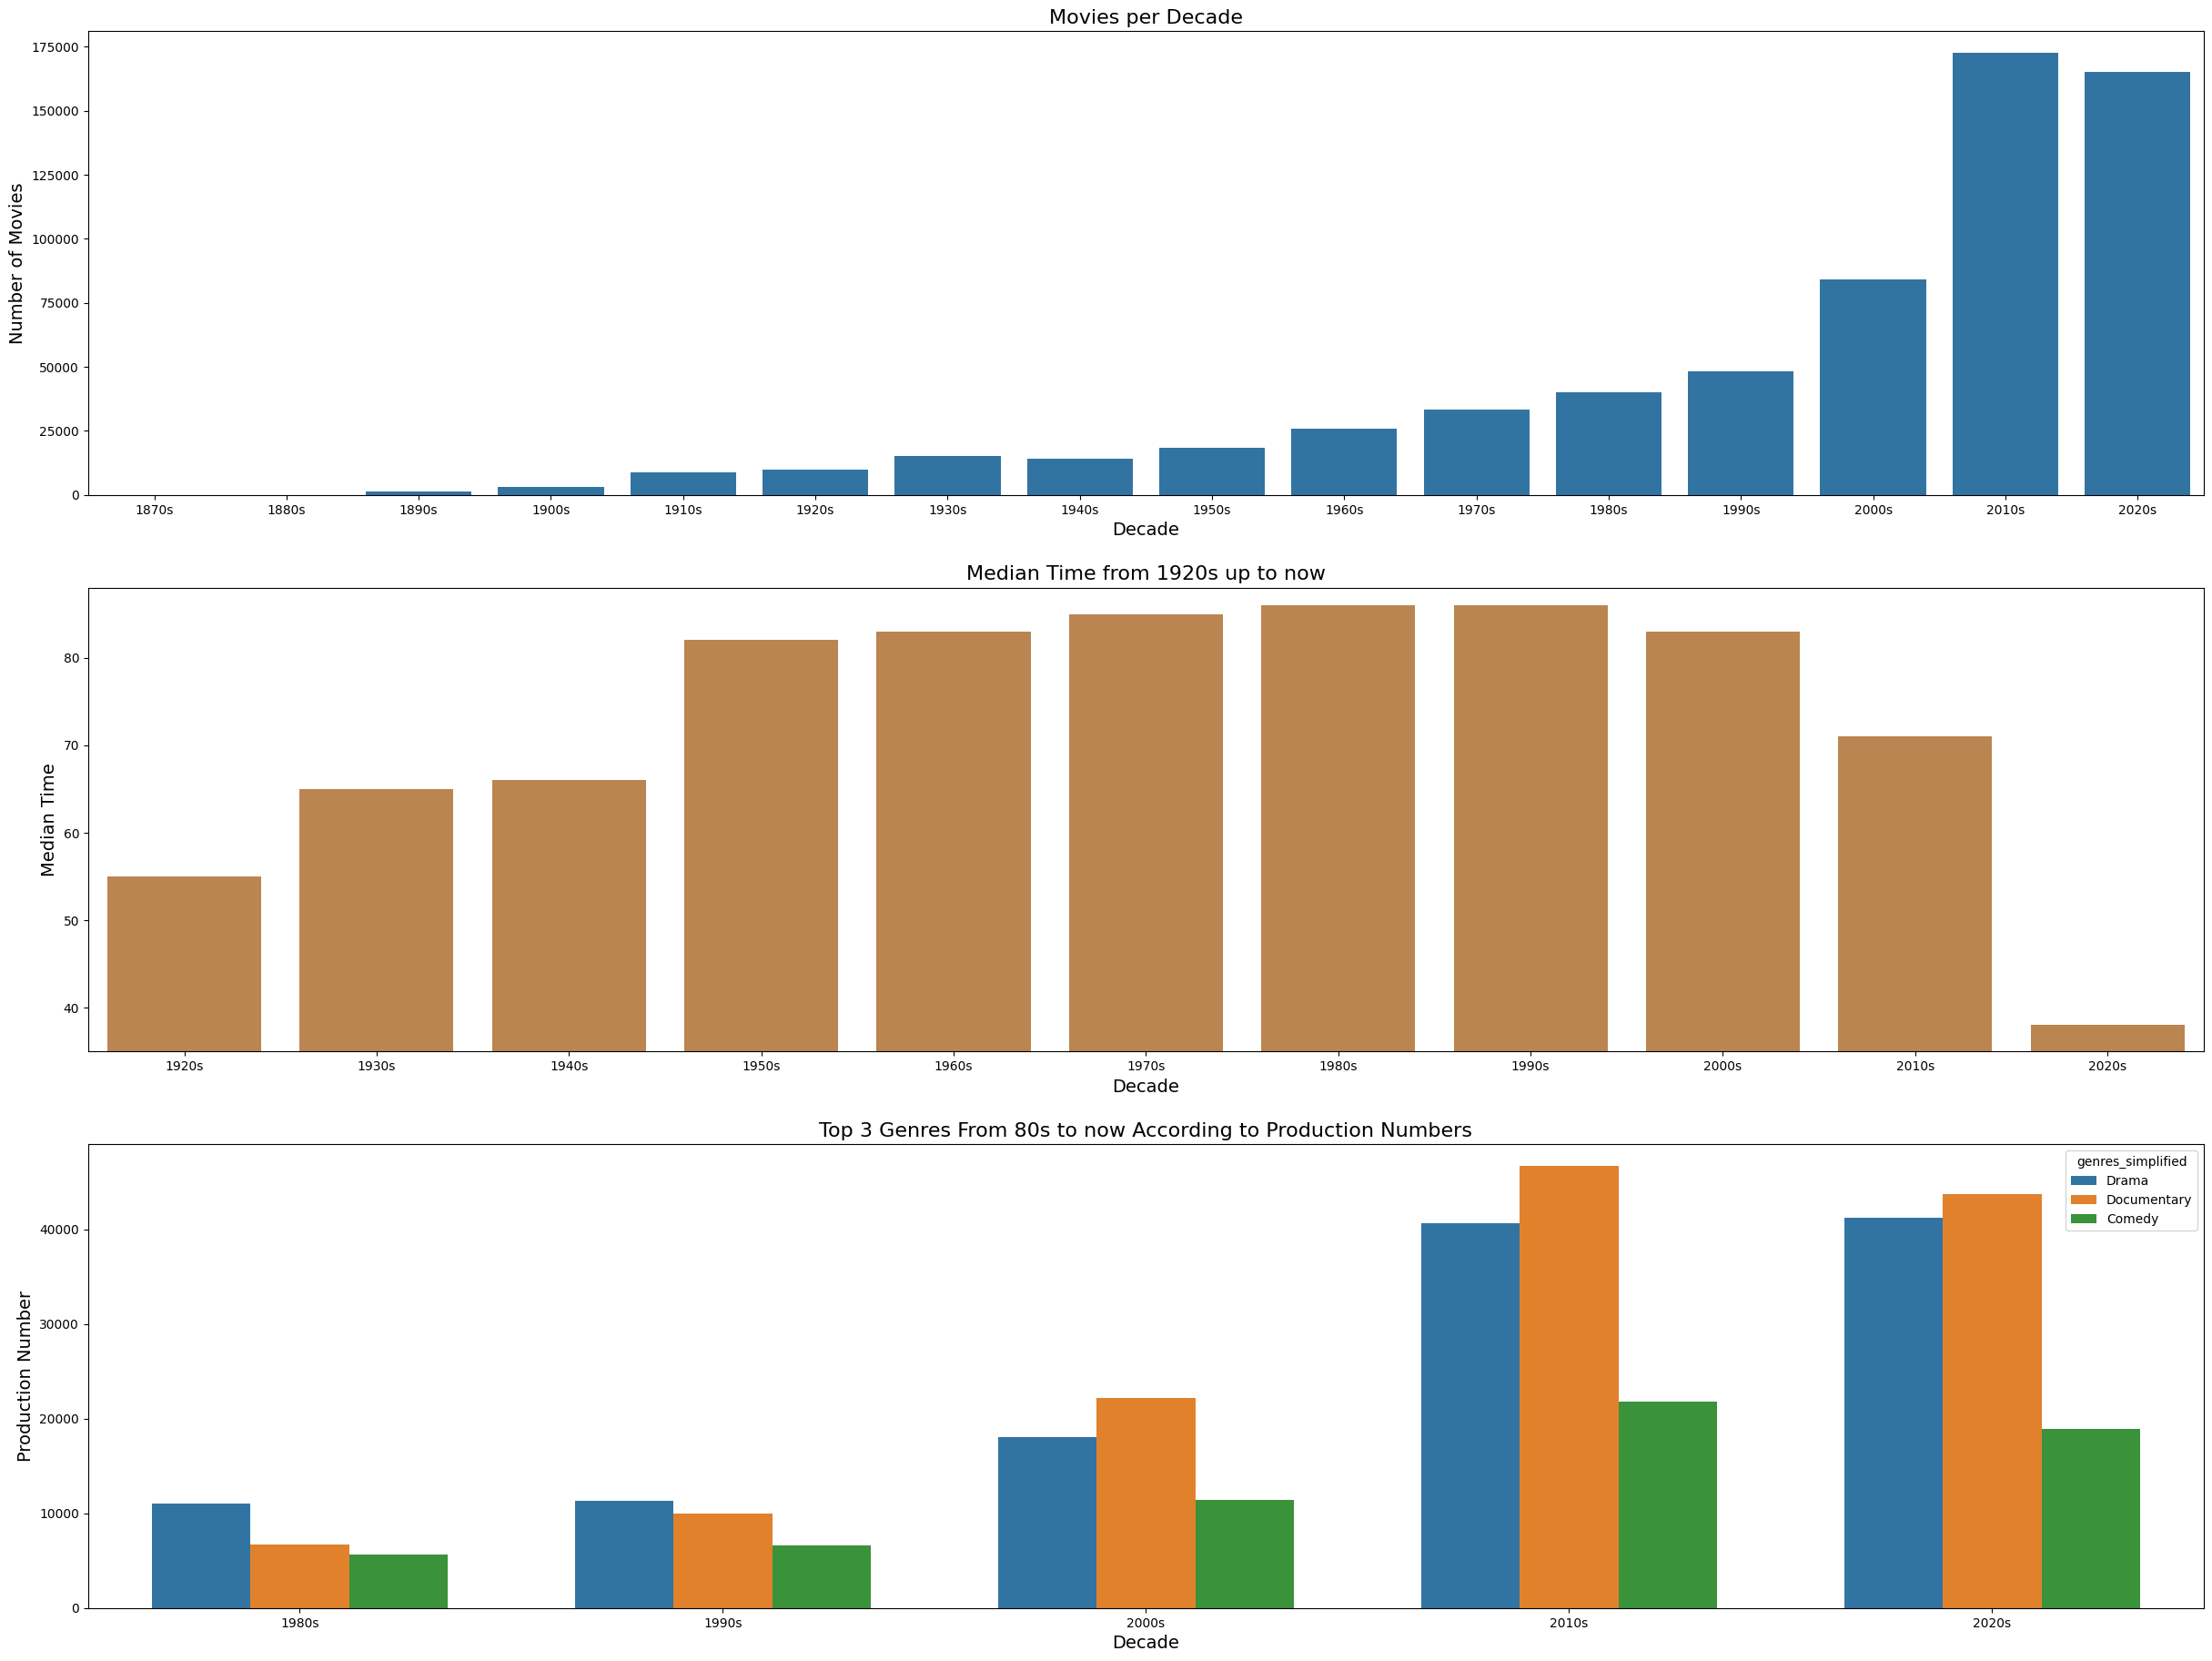

In [210]:
#Creating Figure with 2 Subplots
fig = plt.figure(figsize=(30,22.5))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

#Creating Barplot Movies per Decade
sns.barplot(data=movies_per_decade.iloc[0:16,:], ax=ax1, x='decade', y='count')
ax1.set_ylabel('Number of Movies', fontsize=14)
ax1.set_xlabel('Decade', fontsize=14)
ax1.set_title('Movies per Decade', fontsize=16)

#Creating Barplot Median Time per Decade from 1920's up to now
sns.barplot(data=median_time.loc['1920s':'2020s'],
            ax=ax2, x=median_time.loc['1920s':'2020s'].index,
            y='runtime', color='peru')
ax2.set_ylabel('Median Time', fontsize=14)
ax2.set_xlabel('Decade', fontsize=14)
ax2.set_title('Median Time from 1920s up to now', fontsize=16)
ax2.set_ylim(35,88)

#Top Genres From 80's to now from production numbers
sns.barplot(data=top_genres.iloc[30:45,:], ax=ax3, x='decade', y='count',
            hue='genres_simplified',width=0.7)
ax3.set_ylabel('Production Number', fontsize=14)
ax3.set_xlabel('Decade', fontsize=14)
ax3.set_title('Top 3 Genres From 80s to now According to Production Numbers',
              fontsize=16)

###**Economical Analysis**

Text(0.5, 1.0, 'ROI per Decade')

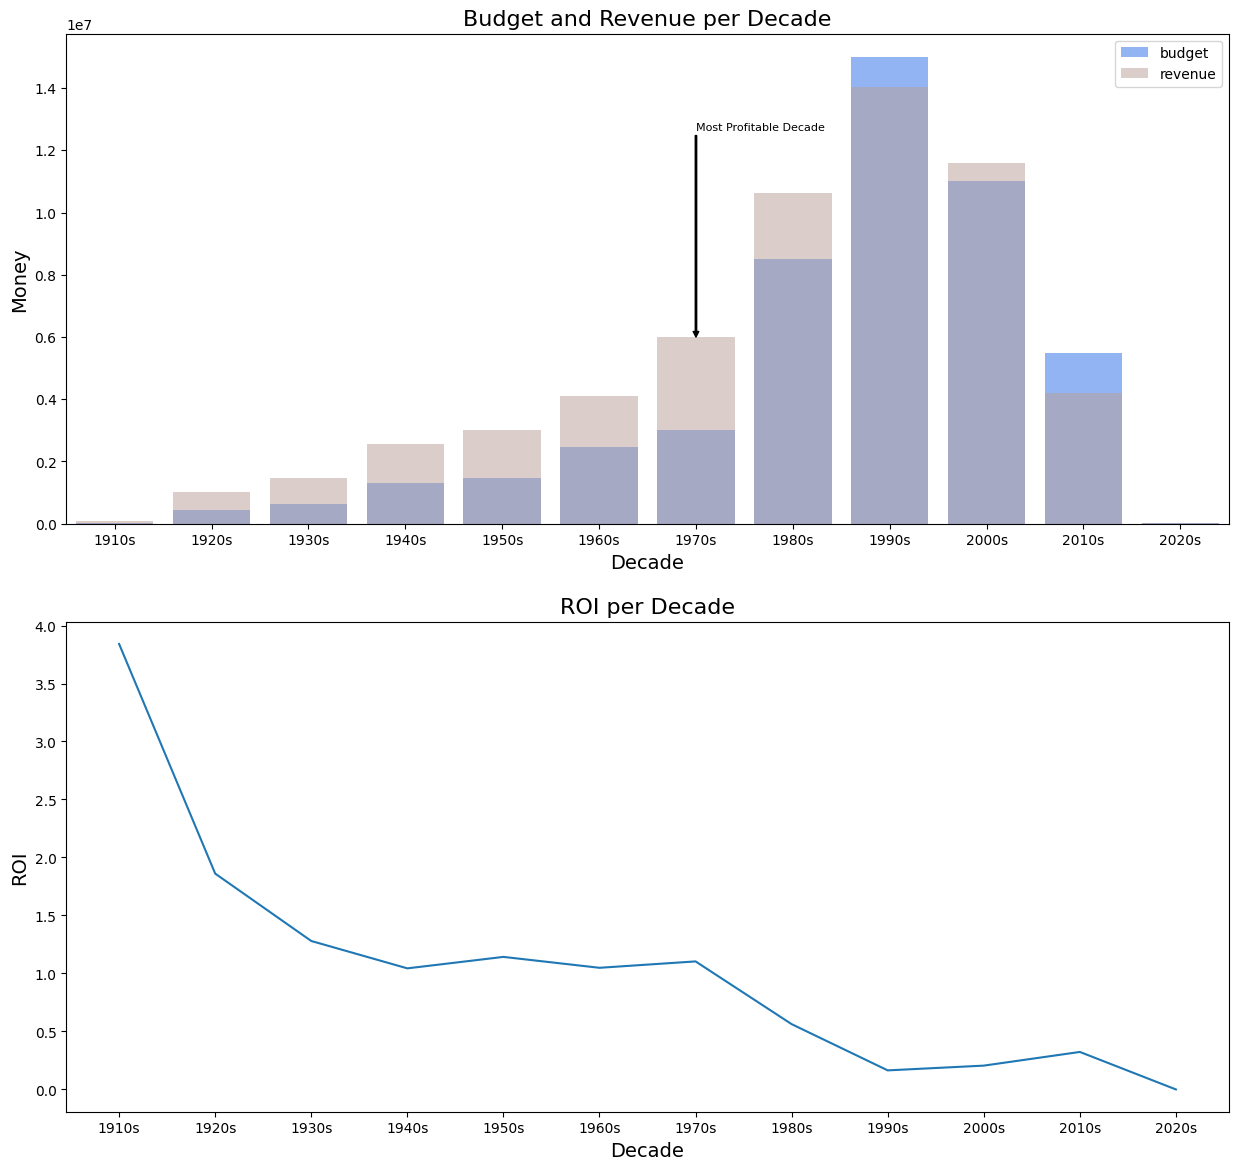

In [211]:
#Budget Revenue and ROI per Decade based on Median
fig=plt.figure(figsize=(15,14))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

#Budget And Revenue
sns.barplot(data=economical_decade, ax=ax1, x=economical_decade.index,
            y='budget', alpha=0.7, saturation=1,color='cornflowerblue',
            label='budget')
sns.barplot(data=economical_decade, ax=ax1, x=economical_decade.index,
            y='revenue', color='coral', alpha=0.5, saturation=0.2,
            label='revenue')
ax1.legend(loc='best')
ax1.set_xlabel('Decade', fontsize=14)
ax1.set_ylabel('Money', fontsize=14)
ax1.set_title('Budget and Revenue per Decade', fontsize=16)
ax1.annotate('Most Profitable Decade',
             xy=(economical_decade.index[6],economical_decade.iloc[6,1]),
             xytext=(economical_decade.index[6],
                     economical_decade.iloc[7,1]+2*10**6),
             arrowprops=dict(facecolor='black',headwidth=4,width=1,
                             headlength=4),
             fontsize=8)

#ROI
sns.lineplot(data=economical_decade, ax=ax2, x='decade',y='roi')
ax2.set_xlabel('Decade', fontsize=14)
ax2.set_ylabel('ROI', fontsize=14)
ax2.set_title('ROI per Decade', fontsize=16)

The most profitable decade is actually 1910's with ROI 3,84 however we focus in the analysis from 1920's and onwards that's why we select 1970s.

Text(0.5, 1.0, 'Budget and Revenue per Genre')

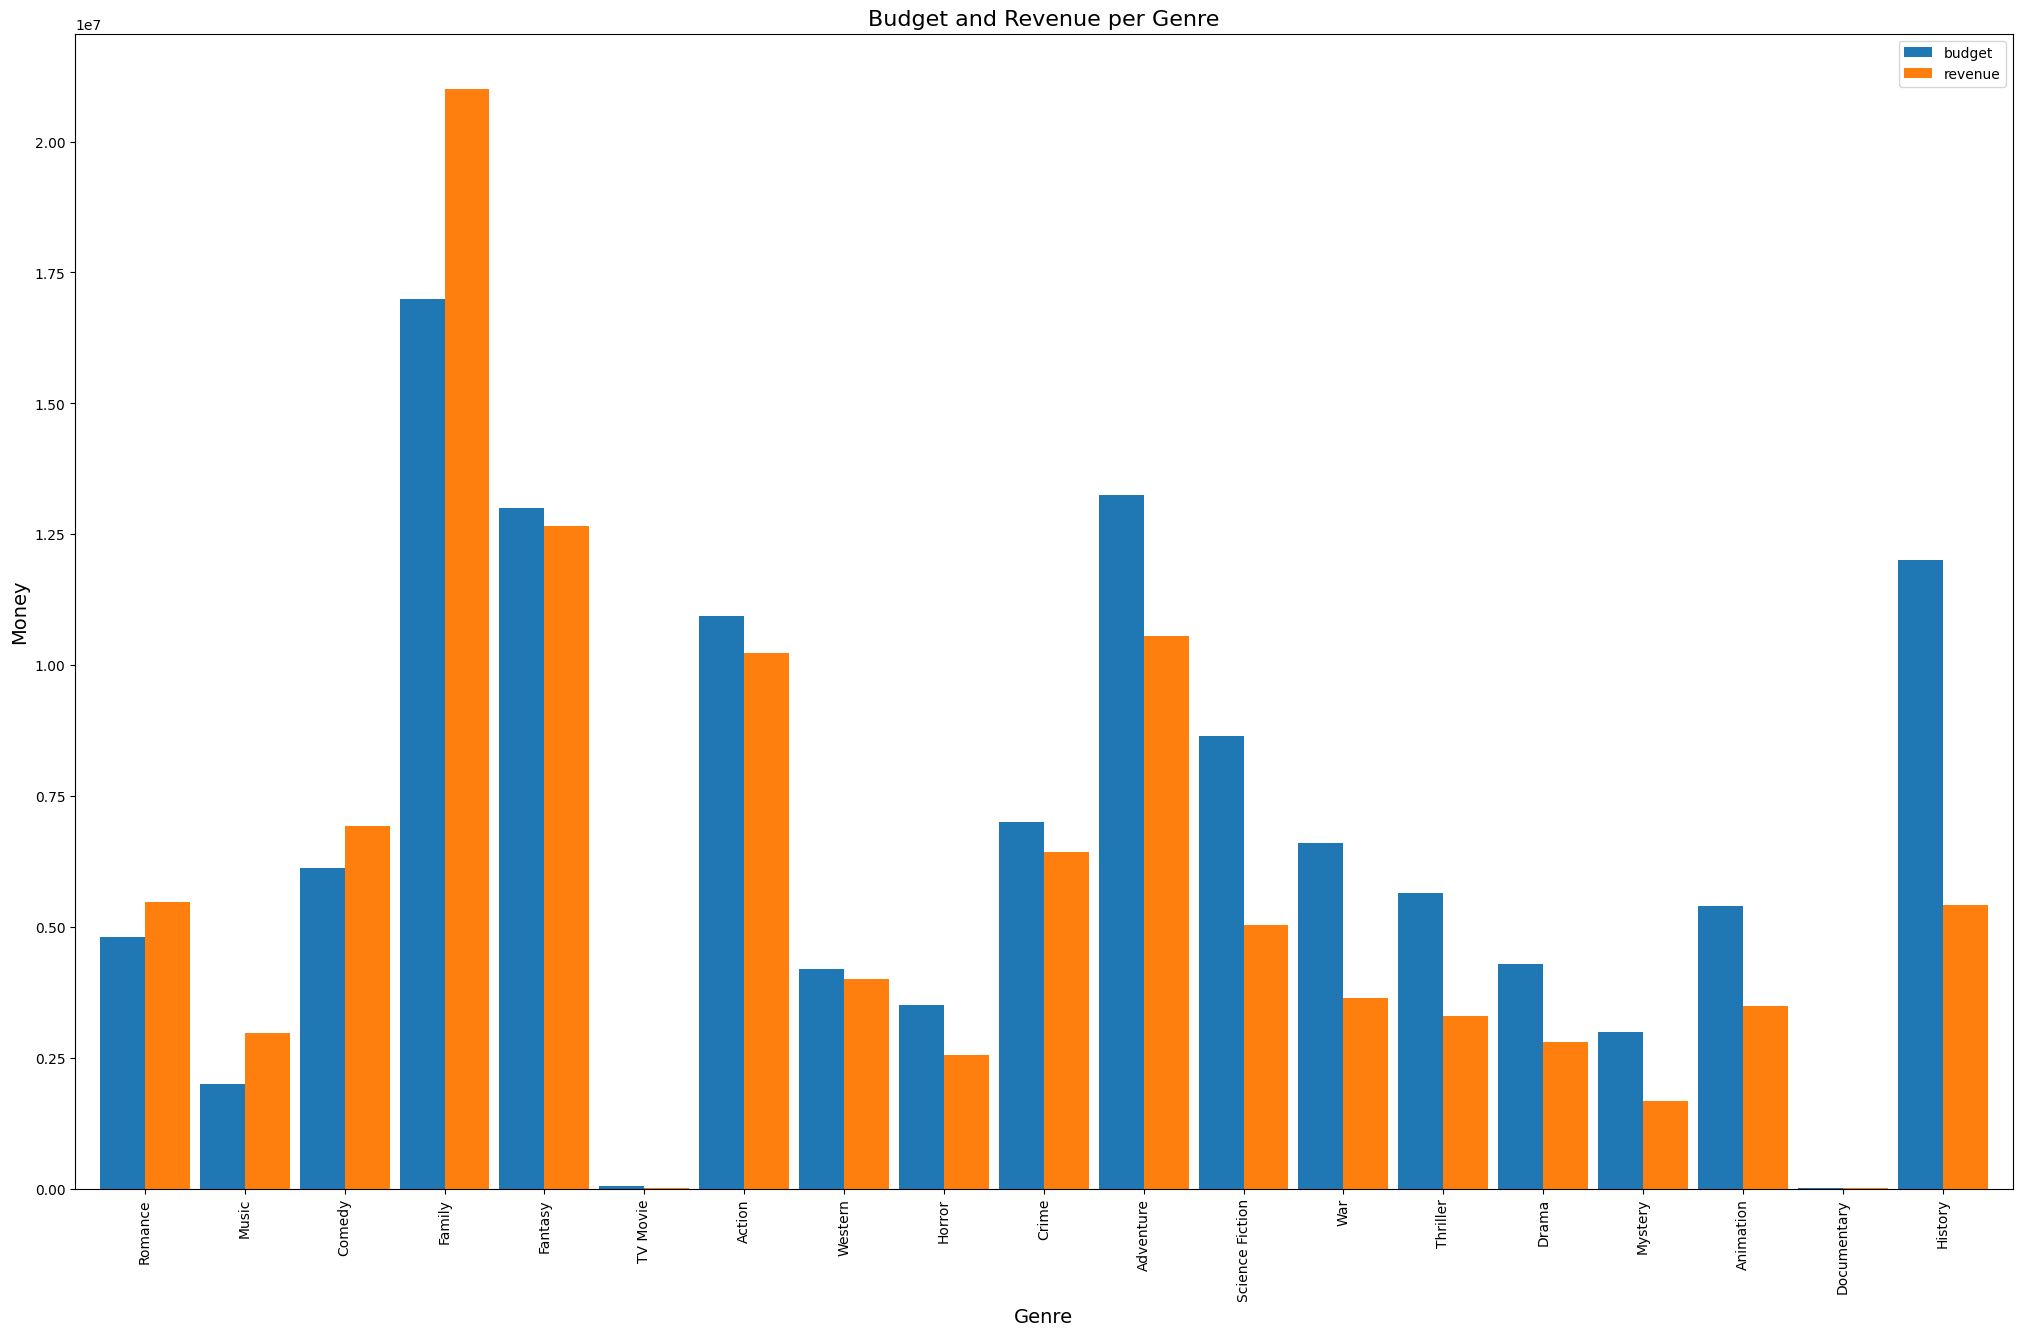

In [212]:
#Budget and Revenue per Genre
fig=plt.figure(figsize=(25,15))
ax1=fig.add_subplot(1,1,1)
economical_genres.plot(kind='bar',
                       x='genres_simplified',
                       y=['budget','revenue'],
                       width=0.9, ax=ax1)
ax1.set_xlabel('Genre', fontsize=14)
ax1.set_ylabel('Money', fontsize=14)
ax1.set_title('Budget and Revenue per Genre', fontsize=16)

Text(0.5, 1.0, 'Genre with most budget per Decade')

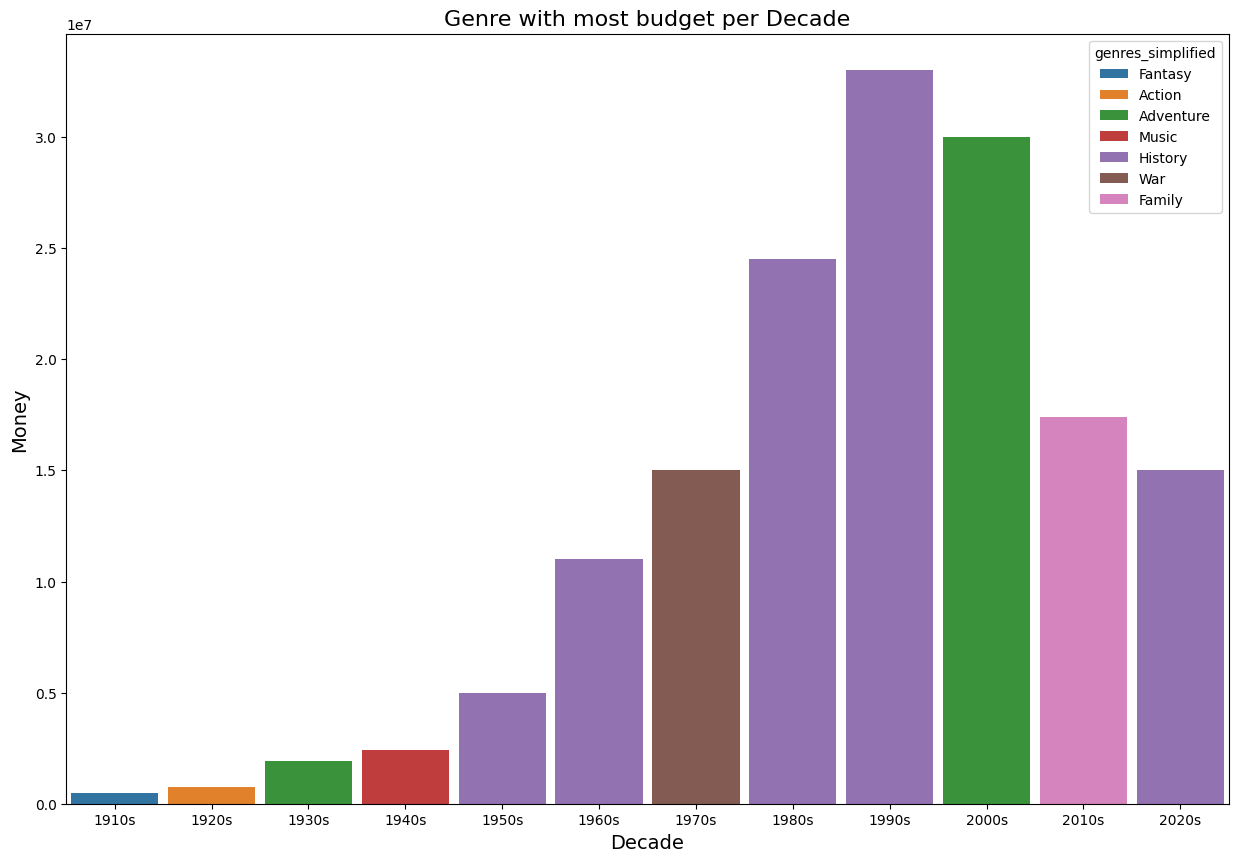

In [213]:
#Genre with most budget per Decade
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,1,1)
sns.barplot(data=most_budget_decade,
                        x='decade',
                        y='budget',
                        width=0.9, ax=ax1, hue='genres_simplified')
ax1.set_xlabel('Decade', fontsize=14)
ax1.set_ylabel('Money', fontsize=14)
ax1.set_title('Genre with most budget per Decade', fontsize=16)

###**IMDB Rating**

As this is the last subsection of visualization, we will make 3 barplots corresponding to the best movies of 80s, 90s and 00s of each genre according to the previous analysis. We must not forget that we performed a weighted rating on each movie (votes*rating) as we will get more accurate results. This happens as a movie rated with 9 by 3 people, can outperform a movie with rating 7 with thousands of votes.

/tmp/ipython-input-2067139714.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, fontsize=8)
/tmp/ipython-input-2067139714.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, fontsize=8)
/tmp/ipython-input-2067139714.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, fontsize=8)


(6.0, 9.5)

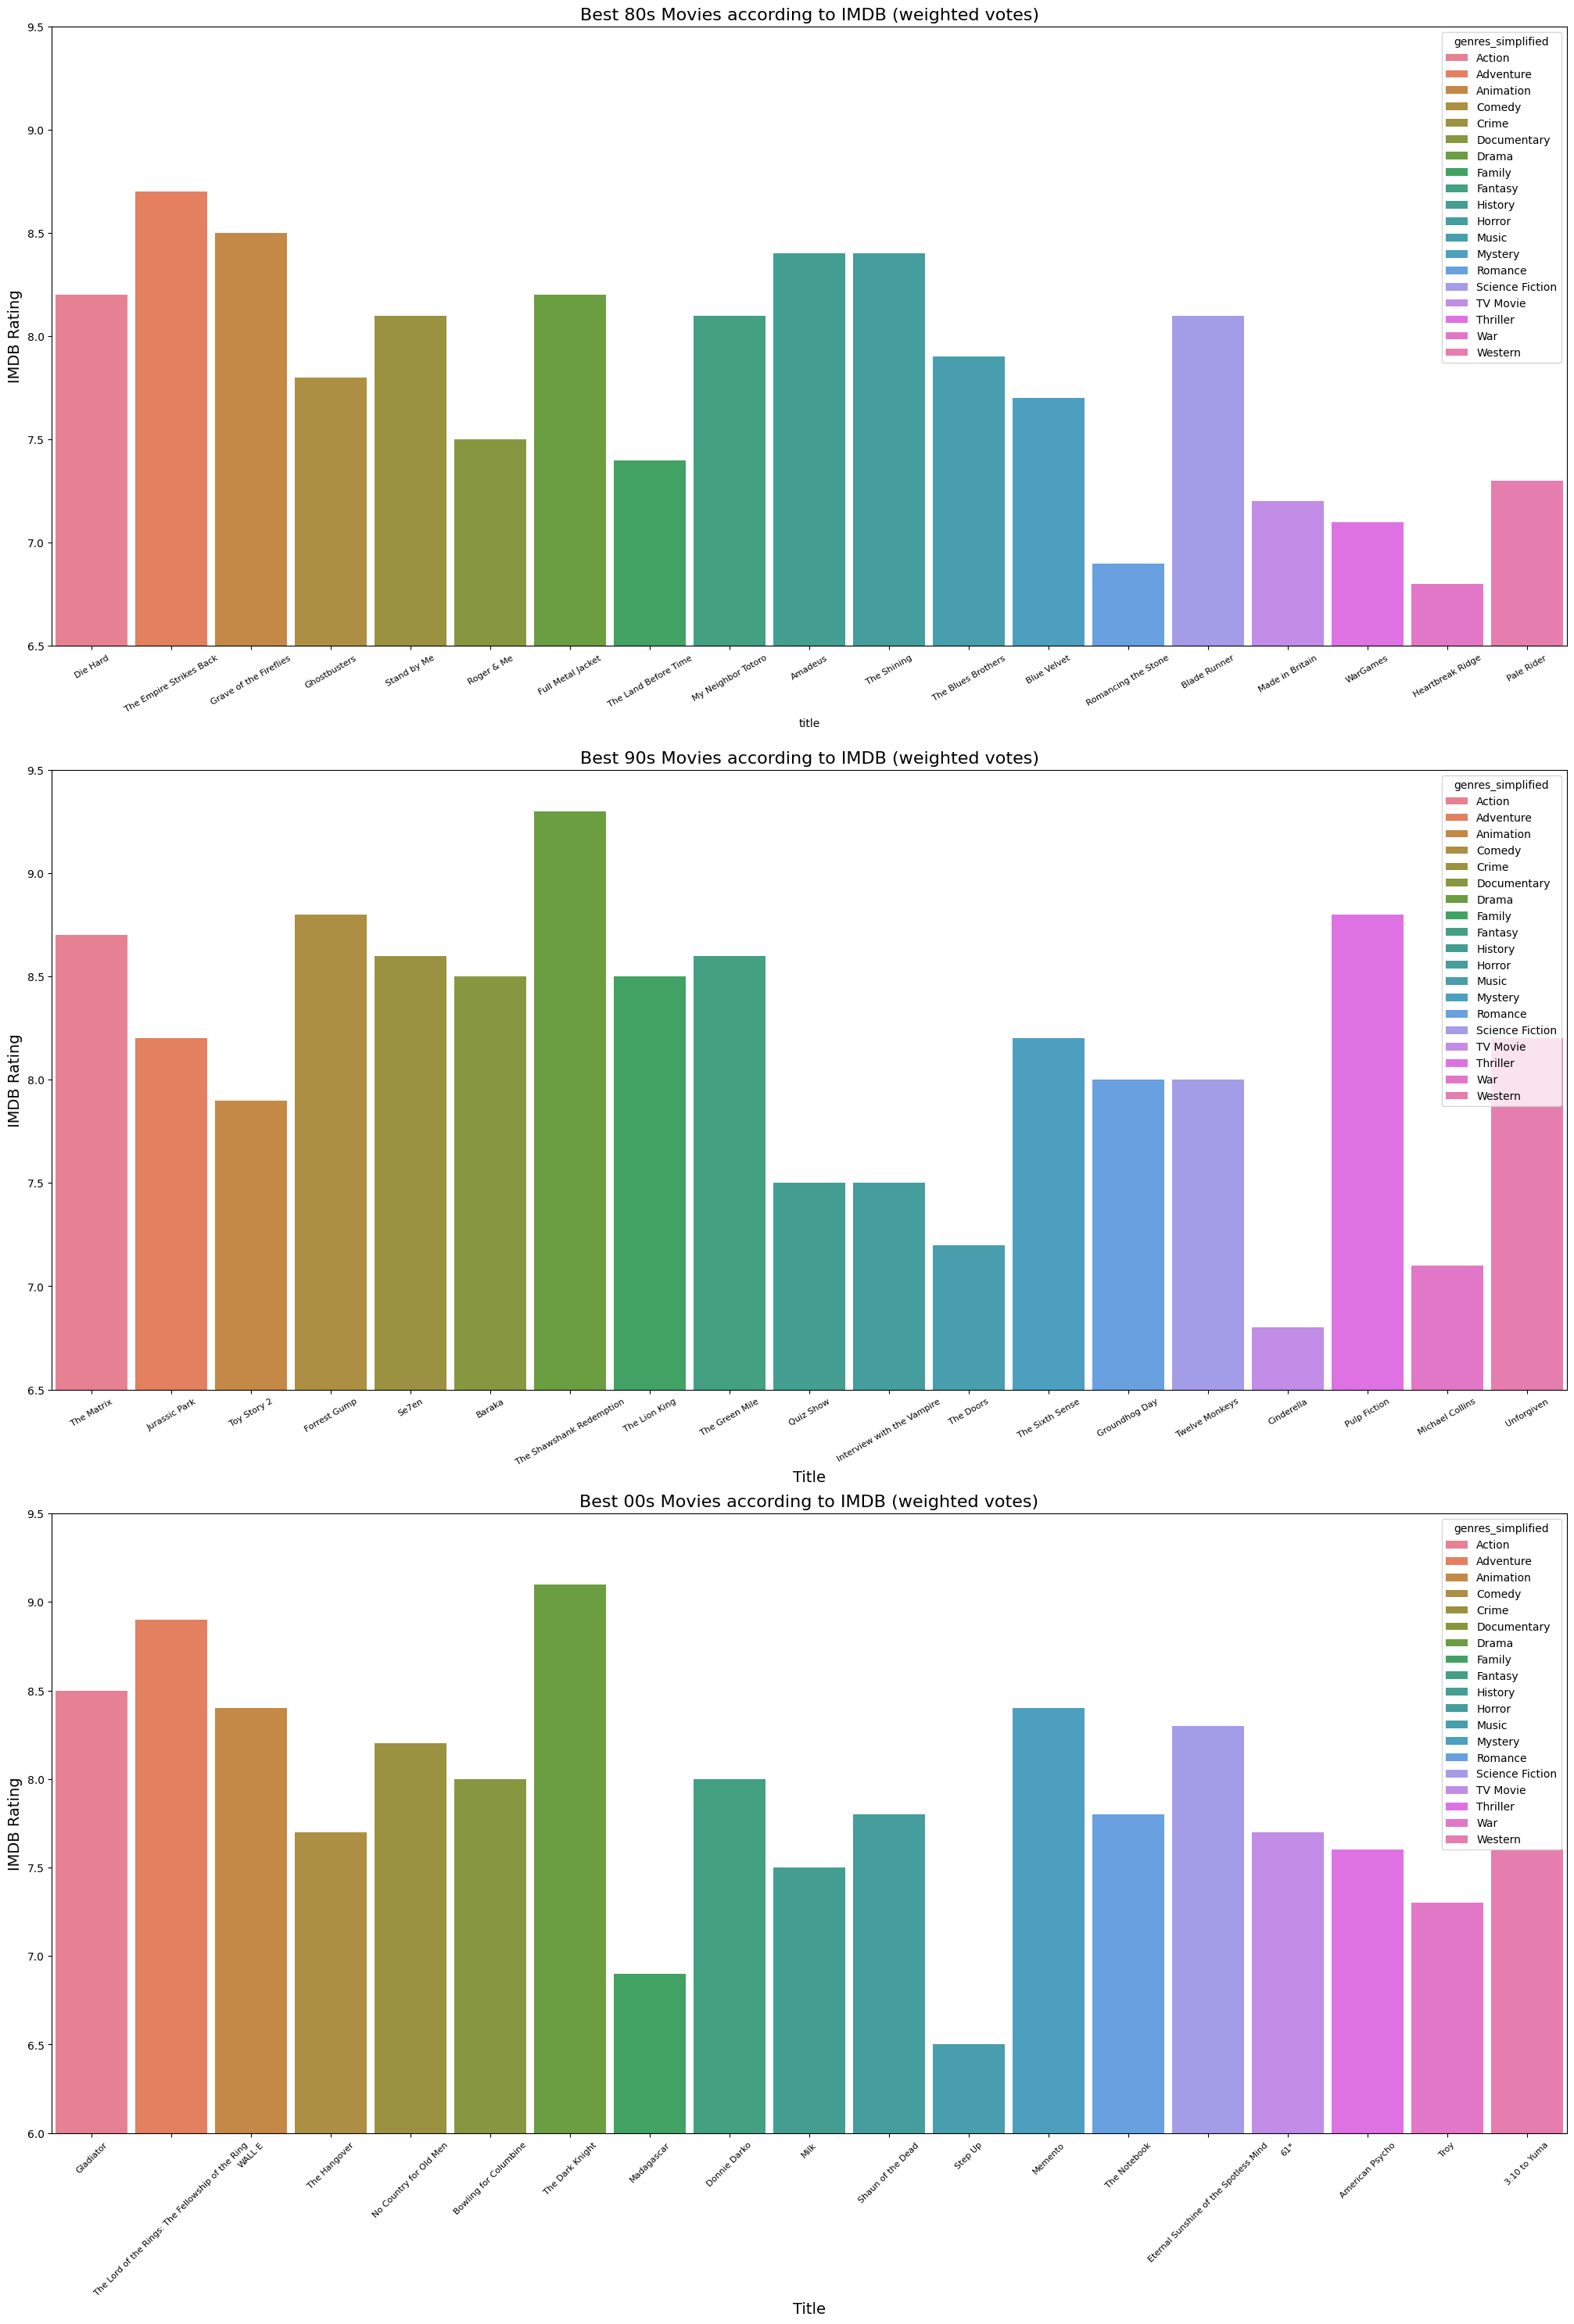

In [214]:
#Best 80s Movies according IMDB (weighted votes)
sns.color_palette('pastel',19)
fig=plt.figure(figsize=(25,35))
ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)

#Barplots
sns.barplot(data=df3.loc['1980s'],
            x='title',
            y='imdb_rating',
            hue='genres_simplified',
            width=0.9, ax=ax1)

sns.barplot(data=df3.loc['1990s'],
            x='title',
            y='imdb_rating',
            hue='genres_simplified',
            width=0.9, ax=ax2)

sns.barplot(data=df3.loc['2000s'],
            x='title',
            y='imdb_rating',
            hue='genres_simplified',
            width=0.9, ax=ax3)


#Customizations for every subplot
ax1.set_ylabel('IMDB Rating', fontsize=14)
ax1.set_title('Best 80s Movies according to IMDB (weighted votes)', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, fontsize=8)
ax1.set_ylim(6.5,9.5)

ax2.set_xlabel('Title', fontsize=14)
ax2.set_ylabel('IMDB Rating', fontsize=14)
ax2.set_title('Best 90s Movies according to IMDB (weighted votes)', fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, fontsize=8)
ax2.set_ylim(6.5,9.5)

ax3.set_xlabel('Title', fontsize=14)
ax3.set_ylabel('IMDB Rating', fontsize=14)
ax3.set_title('Best 00s Movies according to IMDB (weighted votes)', fontsize=16)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, fontsize=8)
ax3.set_ylim(6.0,9.5)

##**Step 7: Conclusion**

Through this exploratory analysis, we examined the evolution and characteristics of a movies dataset across decades, focusing on qualitative features such as Genres and Numerical Features (Budget, Revenue, Runtime, ROI) and their statistical behavior.

**Key Findings**

From a sample of 639.024 movies:

*   There is a geometric increase of produced movies from 90's up to 2010's.
*   While in 20's Century the most movies produced per decade followed the pattern Documentary-Comedy-Drama we can spot a change from 00's to Documentary-Drama-Comedy.
*  The longest in runtime movies were produced in 80s and 90s with a median time 86 minutes then there is a continous drop for the decades following.

From a sample of 13.256 movies where they have been filtered from outliers in budget and revenue resulting in a remaining sample of 12.537 movies:

*  The decade with biggest budget and revenue was the 90s
*  The most profitable decade was the 70's
*  The Biggest ROI was given in 1910's
*  The movie genre with the biggest budget, revenue and profit is 'Family'.
*  The genre with biggest ROI per decade is 'TV Movie'. During the 1990s, the “TV Movie” genre showed the highest median ROI (~7.4) among all categories in the dataset. Although the sample size is small (n = 1), this result aligns with the economic context of the era — television productions typically had very low budgets but stable revenue streams from broadcasting rights and home video sales. Therefore, while the result should be interpreted with caution due to limited data availability, it plausibly reflects the high investment efficiency of 'TV movies' during the 1990s, rather than being a statistical anomaly.
*  The biggest budget per decade per genre of all time was in 90's for 'History' movies (movies like Braveheart) with a median value of 33 million followed by 30 million 'Adventure' Genre in 00's.
